In [1]:
import numpy as np
import random
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt 
from sklearn.metrics import multilabel_confusion_matrix
from sklearn.datasets import make_multilabel_classification
import tensorflow.keras.backend as K


In [2]:

# generate fake data 
X, y = make_multilabel_classification(n_samples=10000, n_features=10, n_classes=5, n_labels=2, random_state=1)
data = X


In [3]:
X.shape, y.shape

((10000, 10), (10000, 5))

In [4]:
np.sum(y, axis = 0)

array([5163, 6406,  339, 4442, 2893])

In [5]:
y[:10,:]

array([[0, 0, 0, 0, 0],
       [0, 1, 0, 0, 0],
       [1, 0, 0, 0, 0],
       [1, 1, 1, 1, 1],
       [1, 1, 0, 0, 0],
       [0, 1, 0, 0, 0],
       [0, 0, 0, 1, 0],
       [1, 1, 0, 1, 0],
       [1, 1, 0, 1, 1],
       [0, 1, 0, 0, 0]])

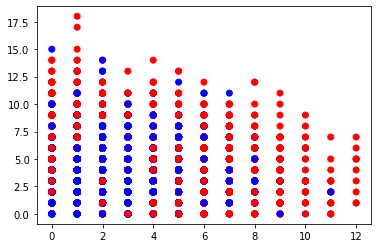

In [6]:
y_col = 1
x_col_1 = 0
x_col_2 = 2


ycolor = y[:, y_col]
colormap = np.array(['r', 'b'])

plt.scatter(X[:, x_col_1], X[:, x_col_2], c=colormap[ycolor])

In [7]:

# idenfify number of data 
N_samples = data.shape[0]
N_to_train = int(N_samples * 0.7) # 70% to train
N_to_valid = int(N_samples * 0.8) # 10% for validation


In [8]:

# randomise data
shuffle_data = [x for x in np.random.permutation(N_samples)]
data = data[shuffle_data,:]
y = y[shuffle_data]

In [9]:

# Data preparation data -> test, validation, test
data_train = data[:N_to_train,:]
y_train = y[:N_to_train]
data_train.shape

data_val = data[N_to_train:N_to_valid,:]
y_val = y[N_to_train:N_to_valid]
data_val.shape

data_test = data[N_to_valid:,:]
y_test = y[N_to_valid:]
data_test.shape


(2000, 10)

In [10]:

# some model: multilayer perceptron
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(32, input_shape=(10,)))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Dense(16))
model.add(tf.keras.layers.Dropout(0.2))
model.add(tf.keras.layers.Dense(5, activation = 'sigmoid'))
model.compile(optimizer='adam', 
              loss='binary_crossentropy',
              metrics = [tf.keras.metrics.BinaryAccuracy()])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 32)                352       
                                                                 
 batch_normalization (BatchN  (None, 32)               128       
 ormalization)                                                   
                                                                 
 dense_1 (Dense)             (None, 16)                528       
                                                                 
 dropout (Dropout)           (None, 16)                0         
                                                                 
 dense_2 (Dense)             (None, 5)                 85        
                                                                 
Total params: 1,093
Trainable params: 1,029
Non-trainable params: 64
_____________________________________________________

In [11]:
model(np.random.random((1, 10)))

<tf.Tensor: shape=(1, 5), dtype=float32, numpy=
array([[0.6106124 , 0.5754304 , 0.39538798, 0.46028492, 0.45906717]],
      dtype=float32)>

In [12]:


# estimating model parameters
epochs_number = 100
history = model.fit(x = data_train, y = y_train, 
                    epochs=epochs_number, 
                    batch_size = 128,
                    validation_data = (data_val, y_val)
                    )



Epoch 1/100
55/55 [==============================] - 3s 8ms/step - loss: 0.6532 - binary_accuracy: 0.6519 - val_loss: 0.4331 - val_binary_accuracy: 0.8018
Epoch 2/100
55/55 [==============================] - 0s 4ms/step - loss: 0.4878 - binary_accuracy: 0.7726 - val_loss: 0.4123 - val_binary_accuracy: 0.8234
Epoch 3/100
55/55 [==============================] - 0s 4ms/step - loss: 0.4356 - binary_accuracy: 0.8001 - val_loss: 0.4006 - val_binary_accuracy: 0.8278
Epoch 4/100
55/55 [==============================] - 0s 5ms/step - loss: 0.4093 - binary_accuracy: 0.8095 - val_loss: 0.3835 - val_binary_accuracy: 0.8264
Epoch 5/100
55/55 [==============================] - 0s 5ms/step - loss: 0.4026 - binary_accuracy: 0.8124 - val_loss: 0.3695 - val_binary_accuracy: 0.8294
Epoch 6/100
55/55 [==============================] - 0s 4ms/step - loss: 0.3988 - binary_accuracy: 0.8140 - val_loss: 0.3654 - val_binary_accuracy: 0.8306
Epoch 7/100
55/55 [==============================] - 0s 8ms/step - los

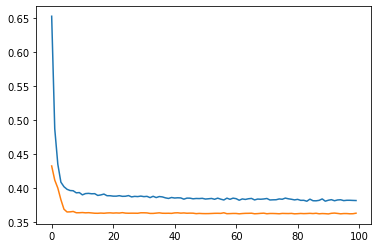

In [13]:

# plot loss of model
epochs = [i for i in range(epochs_number)]
plt.plot(epochs, history.history['loss'])
plt.plot(epochs, history.history['val_loss'])
plt.show()


In [14]:


# test model on unseen (test) data
predictions = model.predict(data_test)
predictions
predicted_classes = np.round(predictions > 0.5)

multilabel_confusion_matrix(y_test, predicted_classes)


63/63 [==============================] - 0s 1ms/step


array([[[ 830,  164],
        [ 198,  808]],

       [[ 435,  298],
        [ 156, 1111]],

       [[1932,    2],
        [  66,    0]],

       [[ 926,  204],
        [ 253,  617]],

       [[1307,  110],
        [ 237,  346]]])

In [21]:
T = 0.5 # Treshold
y_pred=[]
for sample in predictions:
  y_pred.append([1 if i>=0.5 else 0 for i in sample ] )
y_pred = np.array(y_pred)
y_pred

array([[0, 1, 0, 0, 0],
       [0, 1, 0, 0, 1],
       [0, 1, 0, 0, 0],
       ...,
       [1, 1, 0, 1, 0],
       [0, 1, 0, 0, 0],
       [0, 1, 0, 1, 0]])

In [23]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.418

In [29]:
from sklearn.metrics import multilabel_confusion_matrix
multilabel_confusion_matrix(y_test, y_pred)

array([[[ 830,  164],
        [ 198,  808]],

       [[ 435,  298],
        [ 156, 1111]],

       [[1932,    2],
        [  66,    0]],

       [[ 926,  204],
        [ 253,  617]],

       [[1307,  110],
        [ 237,  346]]])

In [15]:
from sklearn.metrics import classification_report

In [16]:
print(classification_report(y_test, predicted_classes))

              precision    recall  f1-score   support

           0       0.83      0.80      0.82      1006
           1       0.79      0.88      0.83      1267
           2       0.00      0.00      0.00        66
           3       0.75      0.71      0.73       870
           4       0.76      0.59      0.67       583

   micro avg       0.79      0.76      0.77      3792
   macro avg       0.63      0.60      0.61      3792
weighted avg       0.77      0.76      0.76      3792
 samples avg       0.76      0.72      0.71      3792



/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in samples with no true labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [17]:
predicted_classes

array([[0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 1.],
       [0., 1., 0., 0., 0.],
       ...,
       [1., 1., 0., 1., 0.],
       [0., 1., 0., 0., 0.],
       [0., 1., 0., 1., 0.]], dtype=float16)

In [18]:
np.round(predictions[:10,:],2)

array([[0.02, 0.94, 0.01, 0.31, 0.18],
       [0.46, 0.83, 0.02, 0.08, 0.9 ],
       [0.14, 0.98, 0.02, 0.4 , 0.06],
       [0.94, 0.64, 0.01, 0.15, 0.23],
       [0.01, 0.5 , 0.12, 0.16, 0.23],
       [0.14, 0.23, 0.05, 0.91, 0.68],
       [0.08, 0.99, 0.01, 0.28, 0.23],
       [1.  , 0.33, 0.01, 0.03, 0.43],
       [0.79, 0.69, 0.13, 0.2 , 0.49],
       [0.96, 0.51, 0.  , 0.14, 0.1 ]], dtype=float32)

In [19]:
y_test[:10,:]

array([[0, 1, 0, 1, 0],
       [0, 1, 0, 0, 1],
       [0, 1, 0, 0, 0],
       [1, 1, 0, 0, 0],
       [0, 0, 0, 0, 0],
       [0, 0, 0, 1, 1],
       [0, 1, 0, 0, 0],
       [1, 0, 0, 0, 0],
       [0, 0, 0, 0, 0],
       [1, 0, 0, 1, 0]])

###Average Precision
[precision_score funtion has](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.precision_score.html#sklearn-metrics-precision-score)

***average*** parameter is required for multiclass/multilabel targets. 

* **None**, the scores for each class are returned. Otherwise, this determines the type of averaging performed on the data:

* '**micro**':
Calculate metrics globally by counting the total true positives, false negatives and false positives.

* '**macro**':
Calculate metrics for each label, and find their unweighted mean. This does not take label imbalance into account.

* '**weighted**':
Calculate metrics for each label, and find their average weighted by support (the number of true instances for each label). This alters ‘macro’ to account for label imbalance; it can result in an F-score that is not between precision and recall.

* '**samples**':
Calculate metrics for each instance, and find their average (only meaningful for multilabel classification where this differs from accuracy_score).

#### Use precision_score function

In [30]:
from sklearn import metrics
print("None ", metrics.precision_score(y_test, y_pred, average=None))  


None  [0.83127572 0.78850248 0.         0.75152253 0.75877193]


In [32]:

print("micro: {:.2f}".format(metrics.precision_score(y_test, y_pred, average='micro')))
print("macro: {:.2f} ".format( metrics.precision_score(y_test, y_pred, average='macro')))
print("weighted: {:.2f} ".format( metrics.precision_score(y_test, y_pred, average='weighted')))
print("samples: {:.2f} ".format( metrics.precision_score(y_test, y_pred, average='samples')))  




micro: 0.79
macro: 0.63 
weighted: 0.77 
samples: 0.76 


/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## Treshold optimization


In [33]:
from sklearn.metrics import f1_score


In [36]:
yhat = model.predict(data_train)
yhat.shape

219/219 [==============================] - 1s 2ms/step


(7000, 5)

In [44]:
T_list = np.linspace(0, 1, 21)


for j in range(5):
    f1_list = []
    for T in T_list:
      predicted = (yhat[:,j] > T).astype(int)
      f1 = f1_score(y_train[:,j], predicted)
      f1_list.append(f1)

    idx = np.argmax(f1_list)
    print("Optimal T={} based on F1 statistic for class {}".format(T_list[idx], j))

Optimal T=0.45 based on F1 statistic for class 0
Optimal T=0.45 based on F1 statistic for class 1
Optimal T=0.1 based on F1 statistic for class 2
Optimal T=0.4 based on F1 statistic for class 3
Optimal T=0.30000000000000004 based on F1 statistic for class 4


Text(0, 0.5, 'F1-statistics')

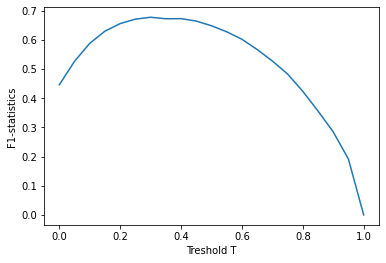

In [43]:
plt.plot(T_list, f1_list)
plt.xlabel("Treshold T")
plt.ylabel("F1-statistics")